In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("main-ped-results.xlsx")

df = df[df["List"] == 1]

In [ ]:

accuracy = (
    df.groupby("PROLIFIC_PID")["correct"]
    .agg(["sum", "count"])
    .reset_index()
)

accuracy["accuracy"] = (accuracy["sum"] / accuracy["count"]) * 100

print(accuracy[["PROLIFIC_PID", "accuracy"]])

                PROLIFIC_PID  accuracy
0   5c5cad3e4ee81200018eafe2      57.5
1   5d80f67177a95c0016e58f70      69.5
2   5ebc168e8b24060127d0dae6      66.5
3   60f6f802c0ede08f7cf69720      70.5
4   610d5a240e1f096a3fda21c5      53.5
5   6165d25922529904e5d7267d      61.5
6   62fd14d7b1e0729dc8aadb79      72.0
7   66098ccb8d0db61d5a55704d      58.5
8   661403131cecbe255b64ca6f      69.0
9   6661b3bccfa516ea302f4556      74.0
10  6679a89dd788cac82b442e62      67.5
11  668be7aeec30f3aae126f42a      74.5
12  66bdfe691012ab575a105910      56.5
13  672c8a3b9fb83ab9c5f02fd2      64.5
14  6740d484133cc071bdfde477      57.0
15  67595fc59f004d86b17e1a6e      58.0
16  67684dd84deabe73a9da9353      70.5
17  67700a9c5c6bfad4410184c7      50.0
18  677a8e5affbe5673b3a79e6b      77.0
19  67d014b21e7434ef93696ba7      68.0
20  67d4249036281f74edbbdec4      51.5
21  67ed3ab3d0a58759388846a3      58.0
22  67f65a16d76fa76c28091ede      68.5
23  67ff743c31d72095f14687e3      73.0


In [ ]:
accuracy = [
    57.5, 69.5, 66.5, 70.5, 53.5,
    61.5, 72.0, 58.5, 69.0, 74.0,
    67.5, 74.5, 56.5, 64.5, 57.0,
    58.0, 70.5, 77.0, 68.0,
    51.5, 58.0, 68.5, 73.0
]


df1 = pd.DataFrame(accuracy, columns=["accuracy"])
print(df1.describe())

t_stat, p_val = stats.ttest_1samp(accuracy, popmean=50)

print("t-statistic:", t_stat)
print("p-value:", p_val)

        accuracy
count  23.000000
mean   65.086957
std     7.429444
min    51.500000
25%    58.000000
50%    67.500000
75%    70.500000
max    77.000000
t-statistic: 9.738884936403537
p-value: 1.9493326231594974e-09


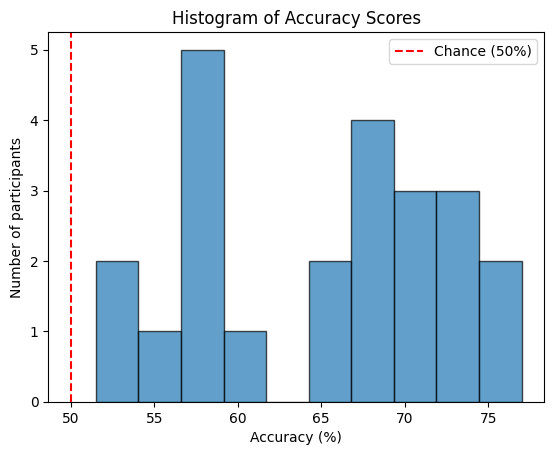

In [9]:
plt.hist(accuracy, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(50, color='red', linestyle='--', label="Chance (50%)")
plt.xlabel("Accuracy (%)")
plt.ylabel("Number of participants")
plt.title("Histogram of Accuracy Scores")
plt.legend()
plt.savefig('ped_histo.png')
plt.show()

In [ ]:
q1 = np.percentile(accuracy, 25)
q3 = np.percentile(accuracy, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [x for x in accuracy if x < lower_bound or x > upper_bound]

print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)
print("IQR:", iqr)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outliers:", outliers)

Q1 (25th percentile): 58.0
Q3 (75th percentile): 70.5
IQR: 12.5
Lower bound: 39.25
Upper bound: 89.25
Outliers: []


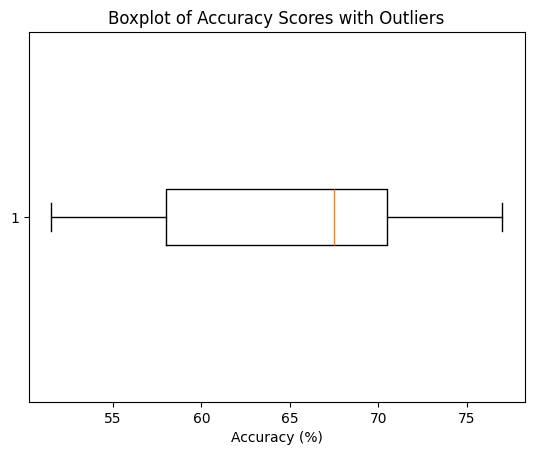

In [8]:
plt.boxplot(accuracy, vert=False)
plt.xlabel("Accuracy (%)")
plt.title("Boxplot of Accuracy Scores with Outliers")
plt.savefig('ped_boxplot.png')
plt.show()

In [ ]:
easy_images = [
    "budapest_02095.jpg",
    "budapest_02096.jpg",
    "budapest_02199.jpg",
    "koeln_01069.jpg",
    "koeln_01081.jpg",
    "koeln_01099.jpg",
    "koeln_01149.jpg",
    "koeln_01210.jpg",
    "koeln_01229.jpg",
    "prague_02934.jpg"
]

df_easy = df[df["Image"].isin(easy_images)]

easy_scores = (
    df_easy.groupby("PROLIFIC_PID")["correct"]
    .sum()
    .reset_index()
    .rename(columns={"correct": "easy_correct"})
)

results = df.groupby("PROLIFIC_PID")["correct"].sum().reset_index()
results = results.merge(easy_scores, on="PROLIFIC_PID", how="left").fillna(0)

print(results)

                PROLIFIC_PID  correct  easy_correct
0   5c5cad3e4ee81200018eafe2      115             7
1   5d80f67177a95c0016e58f70      139             9
2   5ebc168e8b24060127d0dae6      133             9
3   60f6f802c0ede08f7cf69720      141             9
4   610d5a240e1f096a3fda21c5      107             4
5   6165d25922529904e5d7267d      123             7
6   62fd14d7b1e0729dc8aadb79      144             9
7   66098ccb8d0db61d5a55704d      117             7
8   661403131cecbe255b64ca6f      138             8
9   6661b3bccfa516ea302f4556      148             9
10  6679a89dd788cac82b442e62      135             9
11  668be7aeec30f3aae126f42a      149             8
12  66bdfe691012ab575a105910      113             5
13  672c8a3b9fb83ab9c5f02fd2      129             9
14  6740d484133cc071bdfde477      114             6
15  67595fc59f004d86b17e1a6e      116             8
16  67684dd84deabe73a9da9353      141             8
17  67700a9c5c6bfad4410184c7      100             0
18  677a8e5a

In [ ]:

response_counts = (
    df.groupby(["PROLIFIC_PID", "response"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

response_counts.to_csv("response_counts.csv", index=False)

print("Saved response counts to response_counts.csv")

Saved response counts to response_counts.csv


In [ ]:
file_path = "main-ped-results.xlsx" 
df = pd.read_excel(file_path, sheet_name="Main sheet")
df = df[df["List"] == 1]

image_performance = df.groupby("Image", as_index=False)["accuracy"].mean()

top5_best = image_performance.sort_values(by="accuracy", ascending=False).head(5)
top5_worst = image_performance.sort_values(by="accuracy", ascending=True).head(5)

with pd.ExcelWriter("image_performance_summary.xlsx") as writer:
    top5_best.to_excel(writer, sheet_name="Top5_Best", index=False)
    top5_worst.to_excel(writer, sheet_name="Top5_Worst", index=False)


print("Top 5 Best Performing Images:")
print(top5_best)


print("\nTop 5 Worst Performing Images:")
print(top5_worst)


response_performance = df.groupby("correct_response", as_index=False)["accuracy"].mean()


print("\nAverage Accuracy by Image Type:")
print(response_performance)


if response_performance.loc[response_performance['correct_response'] == 1, 'accuracy'].values[0] > \
response_performance.loc[response_performance['correct_response'] == 2, 'accuracy'].values[0]:
    print("Pedestrian images performed better on average.")
else:
    print("No-pedestrian images performed better on average.")

Top 5 Best Performing Images:
                 Image   accuracy
86   leipzig_01076.jpg  69.384615
111     lyon_01070.jpg  69.076923
178   zagreb_02064.jpg  68.961538
81   leipzig_01060.jpg  68.923077
190   zagreb_02158.jpg  68.923077

Top 5 Worst Performing Images:
                 Image   accuracy
170   zagreb_02029.jpg  65.000000
176   zagreb_02057.jpg  65.000000
106  leipzig_01151.jpg  65.076923
186   zagreb_02141.jpg  65.115385
102  leipzig_01145.jpg  65.153846

Average Accuracy by Image Type:
   correct_response   accuracy
0                 1  66.611154
1                 2  67.191923
No-pedestrian images performed better on average.


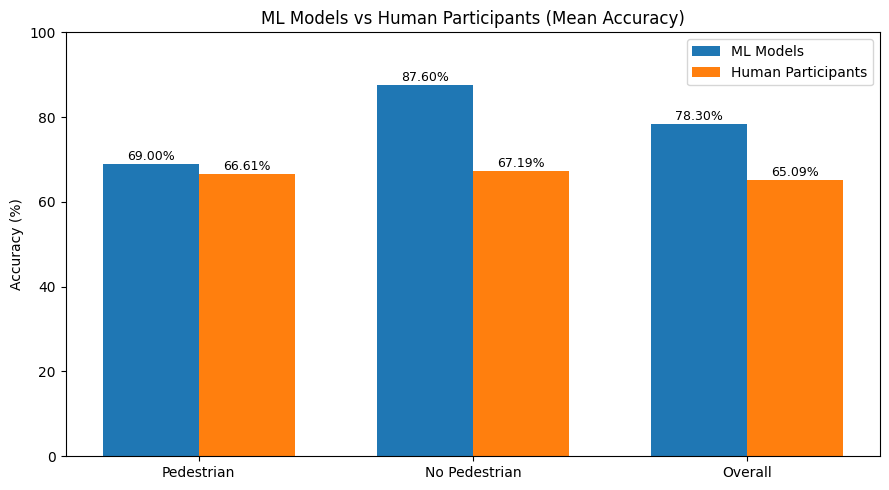

In [ ]:
categories = ["Pedestrian", "No Pedestrian", "Overall"]
ml_models = [69.0, 87.6, 78.3]  
humans = [66.61, 67.19, 65.09]  

x = np.arange(len(categories))  
bar_width = 0.35

plt.figure(figsize=(9, 5))

plt.bar(x - bar_width/2, ml_models, width=bar_width, label="ML Models")
plt.bar(x + bar_width/2, humans, width=bar_width, label="Human Participants")

plt.ylabel("Accuracy (%)")
plt.title("ML Models vs Human Participants (Mean Accuracy)")
plt.xticks(x, categories)
plt.ylim(0, 100)
plt.legend()

for i, v in enumerate(ml_models):
    plt.text(i - bar_width/2, v + 1, f"{v:.2f}%", ha='center', fontsize=9)

for i, v in enumerate(humans):
    plt.text(i + bar_width/2, v + 1, f"{v:.2f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('comparison_mean.png')
plt.show()